#**Proiect Econometrie Avansata**

## Importarea bibliotecilor

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

##Importarea setului de date

In [2]:
file_path = "/content/enhanced_student_habits_performance_dataset.csv"
df = pd.read_csv(file_path)

Setul de date utilizat pentru realizarea proiectului a fost extras de pe keggle, link-ul acestuia fiind: https://www.kaggle.com/datasets/aryan208/student-habits-and-academic-performance-dataset/data

##Verificarea existenței valorilor nule

In [3]:
print(df.isnull().sum())

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
exercise_frequency               0
mental_health_rating             0
extracurricular_participation    0
previous_gpa                     0
semester                         0
stress_level                     0
social_activity                  0
screen_time                      0
access_to_tutoring               0
parental_support_level           0
motivation_level                 0
exam_anxiety_score               0
time_management_score            0
exam_score                       0
dtype: int64


În urma verificării valorilor lipsă din setul de date, am constatat că toate variabilele nu au nicio valoare lipsă. Acest lucru sugerează că datele sunt complete și nu este necesară nicio preprocesare suplimentară pentru tratarea valorilor nule.

## Distribuția scorului la examen

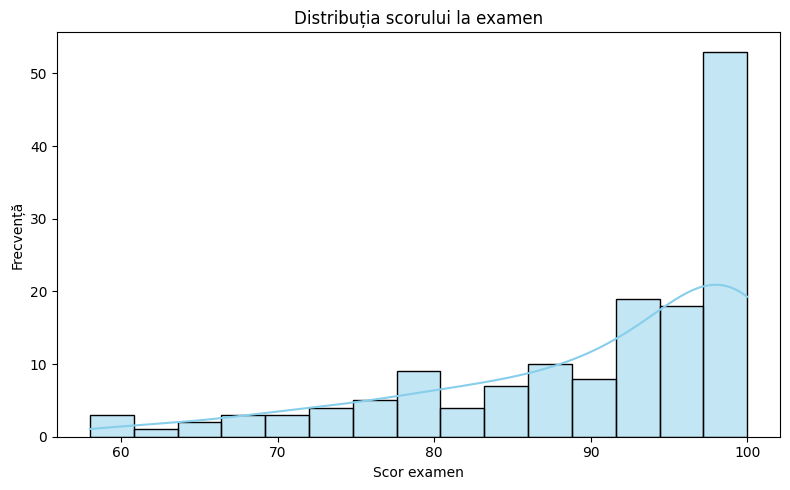

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], bins=15, kde=True, color='skyblue')
plt.title('Distribuția scorului la examen')
plt.xlabel('Scor examen')
plt.ylabel('Frecvență')
plt.tight_layout()
plt.show()

Această histogramă ilustrează distribuția scorurilor obținute la examen. Se observă că distribuția este asimetrică spre stânga, cu o frecvență ridicată a scorurilor ridicate, în special în intervalul 90–100. Curba de densitate (KDE) confirmă această idee, arătând o concentrație semnificativă a valorilor către capătul superior al scalei.

## Scor examen în funcție de orele de studiu

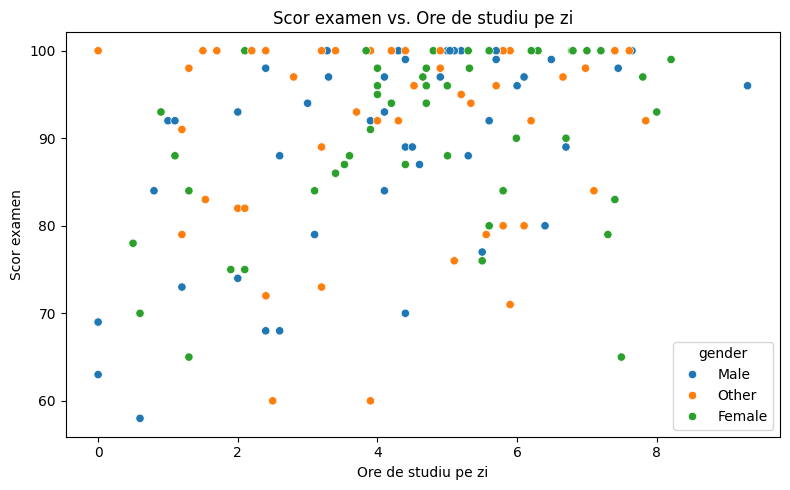

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='study_hours_per_day', y='exam_score', hue='gender')
plt.title('Scor examen vs. Ore de studiu pe zi')
plt.xlabel('Ore de studiu pe zi')
plt.ylabel('Scor examen')
plt.tight_layout()
plt.show()

Acest scatter-plot analizează relația dintre scorul la examen și numărul de ore de studiu pe zi, cu diferențiere pe gen. Din punct de vedere vizual, nu pare să existe o relație clară între cele două variabile. Studenți care au studiat foarte puțin (chiar și 0 ore pe zi) au obținut, în unele cazuri, scoruri foarte mari, iar acest lucru se repetă și pentru cei care au studiat mai multe ore. Dispersia mare a datelor și lipsa unui tipar evident sugerează că numărul de ore de studiu pe zi nu explică în mod convingător variația scorurilor la examen. De asemenea, diferențele între genuri nu par a avea un impact vizibil asupra acestei relații.

## Scorul la examen în funcție de accesul la tutoring

<ipython-input-6-f2a37afdfc59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='access_to_tutoring', y='exam_score', palette="Pastel1")


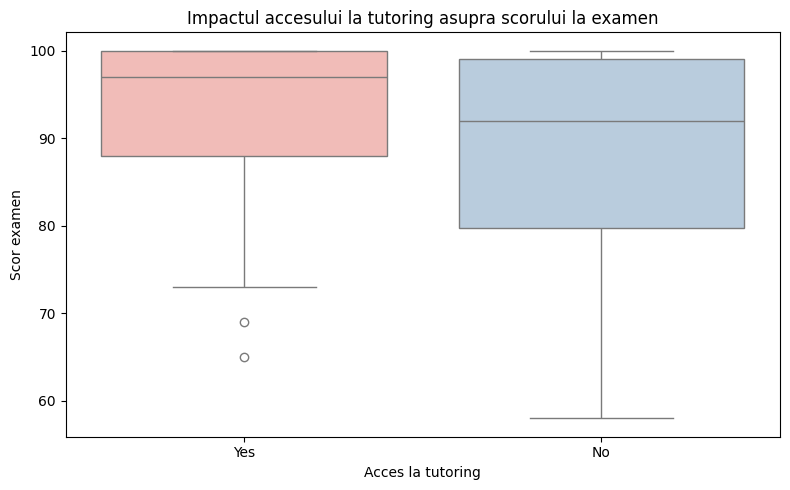

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='access_to_tutoring', y='exam_score', palette="Pastel1")
plt.title('Impactul accesului la tutoring asupra scorului la examen')
plt.xlabel('Acces la tutoring')
plt.ylabel('Scor examen')
plt.tight_layout()
plt.show()

Aceste boxplot-uri analizează impactul accesului la tutoring asupra scorurilor la examen. Din comparația boxploturilor rezultă că studenții care au beneficiat de sesiuni de tutoring au obținut, în medie, scoruri mai mari decât cei care nu au avut acces la aceste sesiuni. În plus, distribuția scorurilor în rândul celor care au beneficiat de tutoring este mai compactă, ceea ce indică un efect stabilizator asupra performanței. Grupul fără tutoring prezintă o variație mai mare și câteva valori extreme joase, ceea ce ar putea sugera că lipsa unui sprijin educațional suplimentar duce la rezultate mai imprevizibile.

## Scorul la examen în funcție de job part-time

<ipython-input-7-ba5141e57209>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='part_time_job', y='exam_score', palette="Set3")


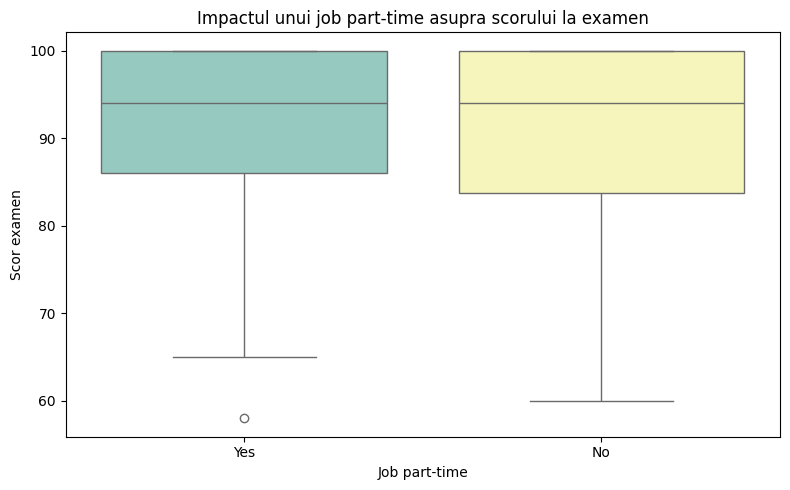

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='part_time_job', y='exam_score', palette="Set3")
plt.title('Impactul unui job part-time asupra scorului la examen')
plt.xlabel('Job part-time')
plt.ylabel('Scor examen')
plt.tight_layout()
plt.show()

Aceste boxplot-uri analizează influența unui job part-time asupra scorului la examen. Diferențele dintre cele două grupuri nu sunt foarte pronunțate, însă se observă o ușoară tendință ca studenții fără job part-time să aibă scoruri mediane puțin mai ridicate. De asemenea, studenții care au avut un job part-time prezintă o variație mai mare a scorurilor, ceea ce ar putea reflecta faptul că timpul și energia alocate muncii pot afecta capacitatea de concentrare și învățare în mod diferit de la o persoană la alta. Cu toate acestea, prezența scorurilor mari și în rândul celor care au avut un job part-time indică faptul că un astfel de angajament nu reprezintă neapărat un obstacol în obținerea unui rezultat bun.

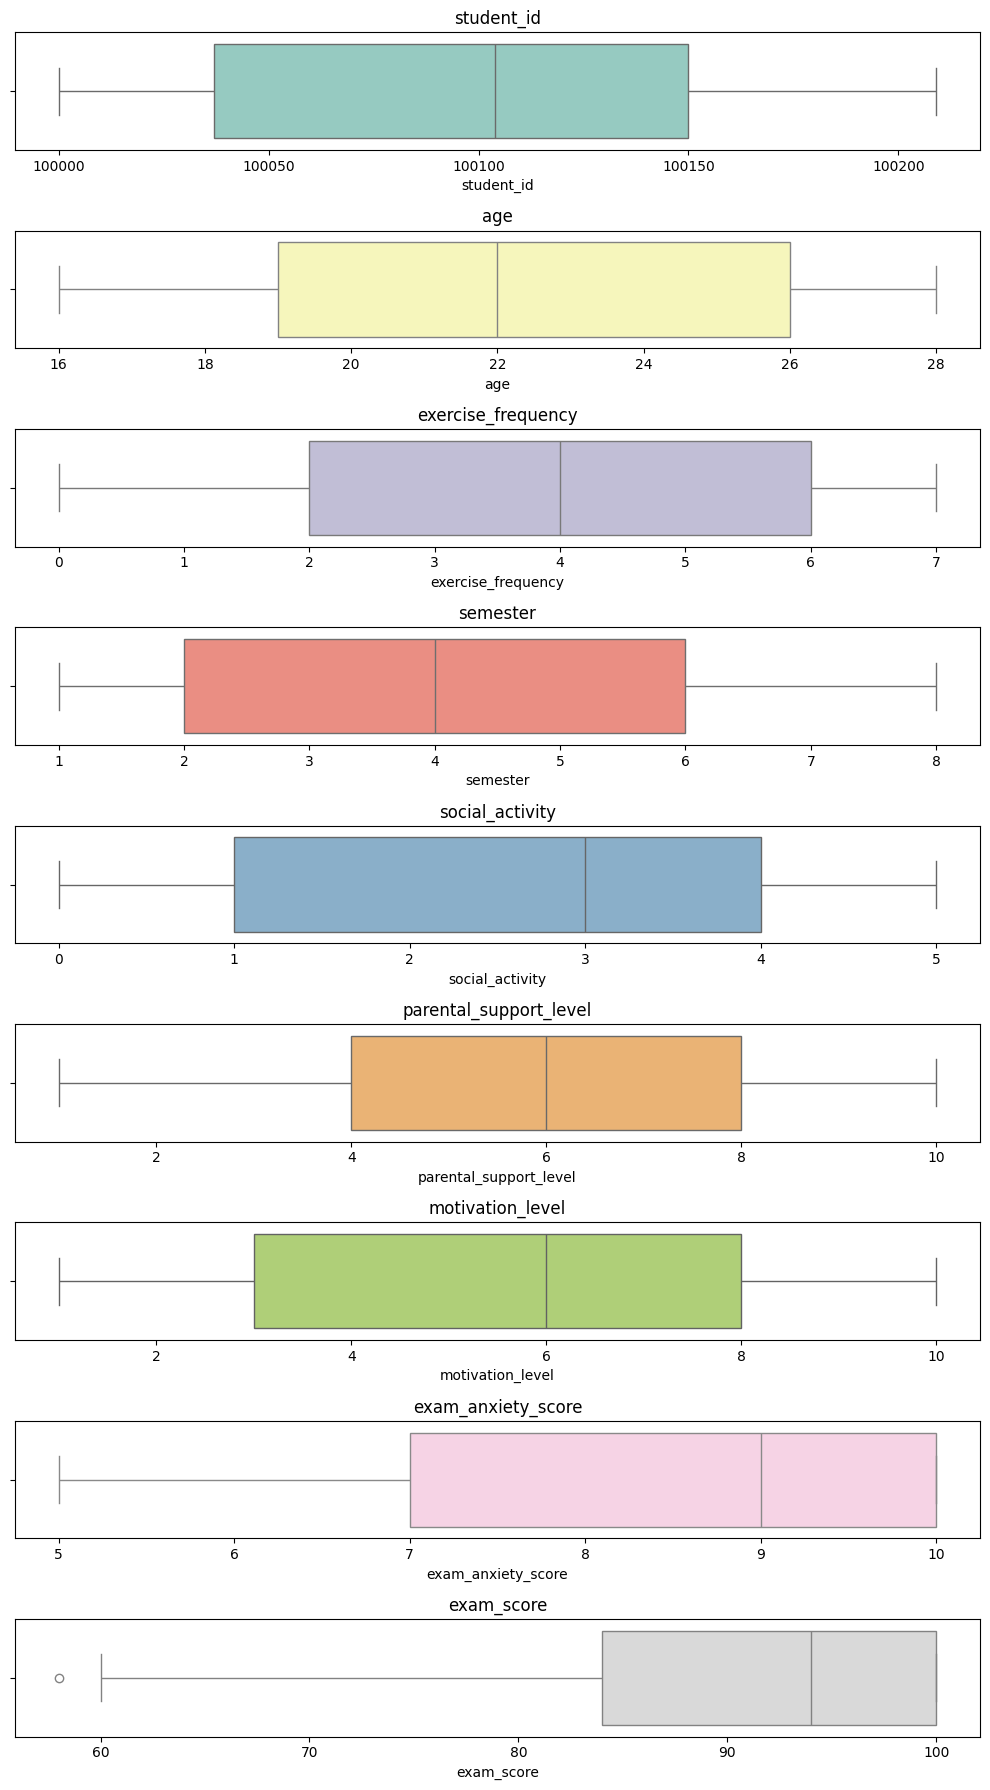

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selectăm coloanele de tip int
col_names = list(df.select_dtypes(include='int64').columns)

# Pregătim culorile din paleta Set3
colors = sns.color_palette("Set3", n_colors=len(col_names))

# Creăm subplot-uri
fig, axes = plt.subplots(len(col_names), 1, figsize=(10, 2 * len(col_names)))

for row, column in enumerate(col_names):
    sns.boxplot(x=df[column], ax=axes[row], color=colors[row])
    axes[row].set_title(column)

plt.tight_layout()
plt.show()


În ceea ce privește age, valorile variază între 16 și 28 de ani, cu o medie situată în jurul vârstei de 22. Distribuția este relativ simetrică, fără valori extreme evidente. Acest lucru indică un grup de studenți predominant tineri, în mare parte în intervalul clasic de vârstă universitară.

Variabila exercise_frequency, care măsoară frecvența exercițiilor fizice, are o distribuție relativ echilibrată între 0 și 7 zile pe săptămână. Mediană se află în jurul valorii 4, ceea ce înseamnă că jumătate dintre studenți fac sport cel puțin patru zile pe săptămână. Nu există outlieri, ceea ce sugerează o variabilitate normală în comportamentul fizic.

În cazul variabilei semester, valorile sunt distribuite între semestrul 1 și semestrul 8, cu o mediană în jurul semestrului 4–5. Aceasta reflectă un eșantion bine distribuit pe parcursul ciclului de studii universitare, fără dezechilibre majore.

Pentru social_activity, scorurile variază între 0 și 5, cu o mediană în jurul valorii 3. Aceasta indică faptul că majoritatea studenților participă într-o oarecare măsură la activități sociale, deși există și cazuri cu interacțiune socială redusă (0–1).

Variabila parental_support_level arată o distribuție aproape simetrică, cu valori între 2 și 10 și o mediană situată în jurul valorii 6. Sprijinul oferit de părinți este, în general, moderat spre ridicat, fără valori extreme negative, ceea ce sugerează un mediu familial relativ stabil pentru majoritatea respondenților.

În ceea ce privește motivation_level, valorile sunt între 2 și 10, cu o mediană în jur de 6–7. Distribuția este ușor asimetrică, cu o tendință spre niveluri mai ridicate de motivație. Acest lucru sugerează că o bună parte dintre studenți sunt motivați să învețe, aspect ce ar putea influența scorul la examen.

Variabila exam_anxiety_score este concentrată în intervalul 7–10, cu o mediană foarte ridicată, în jur de 9. Această distribuție indică faptul că anxietatea de examen este frecventă și ridicată în rândul studenților, ceea ce ar putea avea un impact negativ asupra performanței academice.

În final, exam_score variază între aproximativ 60 și 100, cu o mediană ridicată (aproape de 90). Există o valoare outlier în zona inferioară (în jur de 60), însă în general scorurile sunt bune, reflectând o tendință de performanță înaltă în cadrul grupului analizat.

 ## **Media orelor de studiu pe semestru**

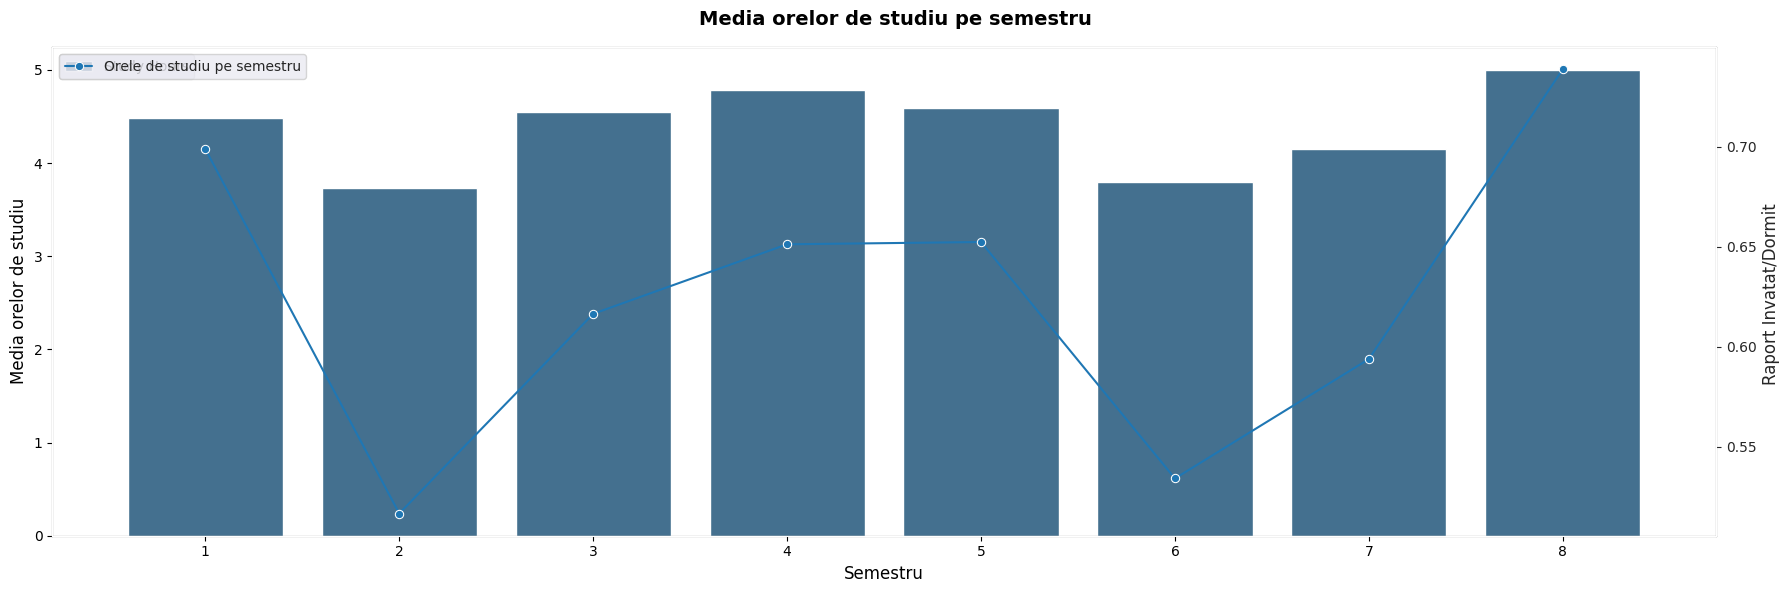

In [5]:
# Grupăm datele după 'semester' și calculăm mediile pentru 'study_hours_per_day' și 'sleep_hours'
df_grp_study = df.groupby(['semester'])['study_hours_per_day'].mean().reset_index()
df_grp_sleep = df.groupby(['semester'])['sleep_hours'].mean().reset_index()

# Combinăm cele două tabele și calculăm raportul study/sleep
df_grp_combined = df_grp_study.merge(df_grp_sleep, on='semester')
df_grp_combined['study_per_sleep'] = df_grp_combined['study_hours_per_day'] / df_grp_combined['sleep_hours']

# Vizualizare
f, ax = plt.subplots(figsize=(18, 6))
f.suptitle('Media orelor de studiu pe semestru', fontsize=14, fontweight='bold')
sns.set_style("dark")

# Barplot pentru study_hours_per_day
ax = sns.barplot(data=df_grp_study, x='semester', y='study_hours_per_day',
                 color='tab:blue', saturation=0.5, ax=ax, label='Study Hours')
ax.set_xlabel('Semestru', fontsize=12)
ax.set_ylabel('Media orelor de studiu', fontsize=12)
ax.legend(loc='upper left')
ax.xaxis.set_major_locator(ticker.AutoLocator())

# Linie pentru raportul study_per_sleep
ax2 = ax.twinx()
ax2 = sns.lineplot(data=df_grp_combined['study_per_sleep'], marker='o', ax=ax2,
                   label='Orele de studiu pe semestru')
ax2.set_ylabel('Raport Invatat/Dormit ', fontsize=12)

f.tight_layout()
plt.show()


Graficul combină o diagramă cu bare (pentru media orelor de studiu) și o linie (pentru raportul învățat/dormit) pe parcursul celor 8 semestre. Se observă că media orelor de studiu variază ușor între semestre, fără o tendință clară de creștere sau scădere. Pe de altă parte, raportul învățat/dormit pare să fie ușor corelat cu media orelor de studiu, atingând un maxim în semestrul 8, ceea ce poate sugera o intensificare a efortului academic în ultimele semestre.



##**Comportamentul studenților în raport cu momentul din semestru**

In [6]:
# Derivăm o variabilă: început vs. final de studii
df_grp_combined['semester_der'] = df_grp_combined['semester'].map(
    lambda x: 'early' if x <= 4 else 'late'
)

# Se grupează și se calculeaza mediile
df_summary = df_grp_combined.groupby('semester_der')[['study_hours_per_day', 'sleep_hours', 'study_per_sleep']].mean()
print(df_summary)

              study_hours_per_day  sleep_hours  study_per_sleep
semester_der                                                   
early                    4.386833     7.090703         0.620774
late                     4.383875     6.974746         0.629769


Comparația dintre începutul și finalul studiilor arată că studenții își mențin un nivel similar de studiu zilnic (aprox. 4.38 ore). Totuși, în anii terminali dorm puțin mai puțin (6.97h vs. 7.09h), ceea ce duce la un raport ușor mai mare între studiu și somn. Diferențele sunt minore, dar sugerează o ușoară comprimare a timpului de odihnă spre finalul studiilor.

##**Pairplot**

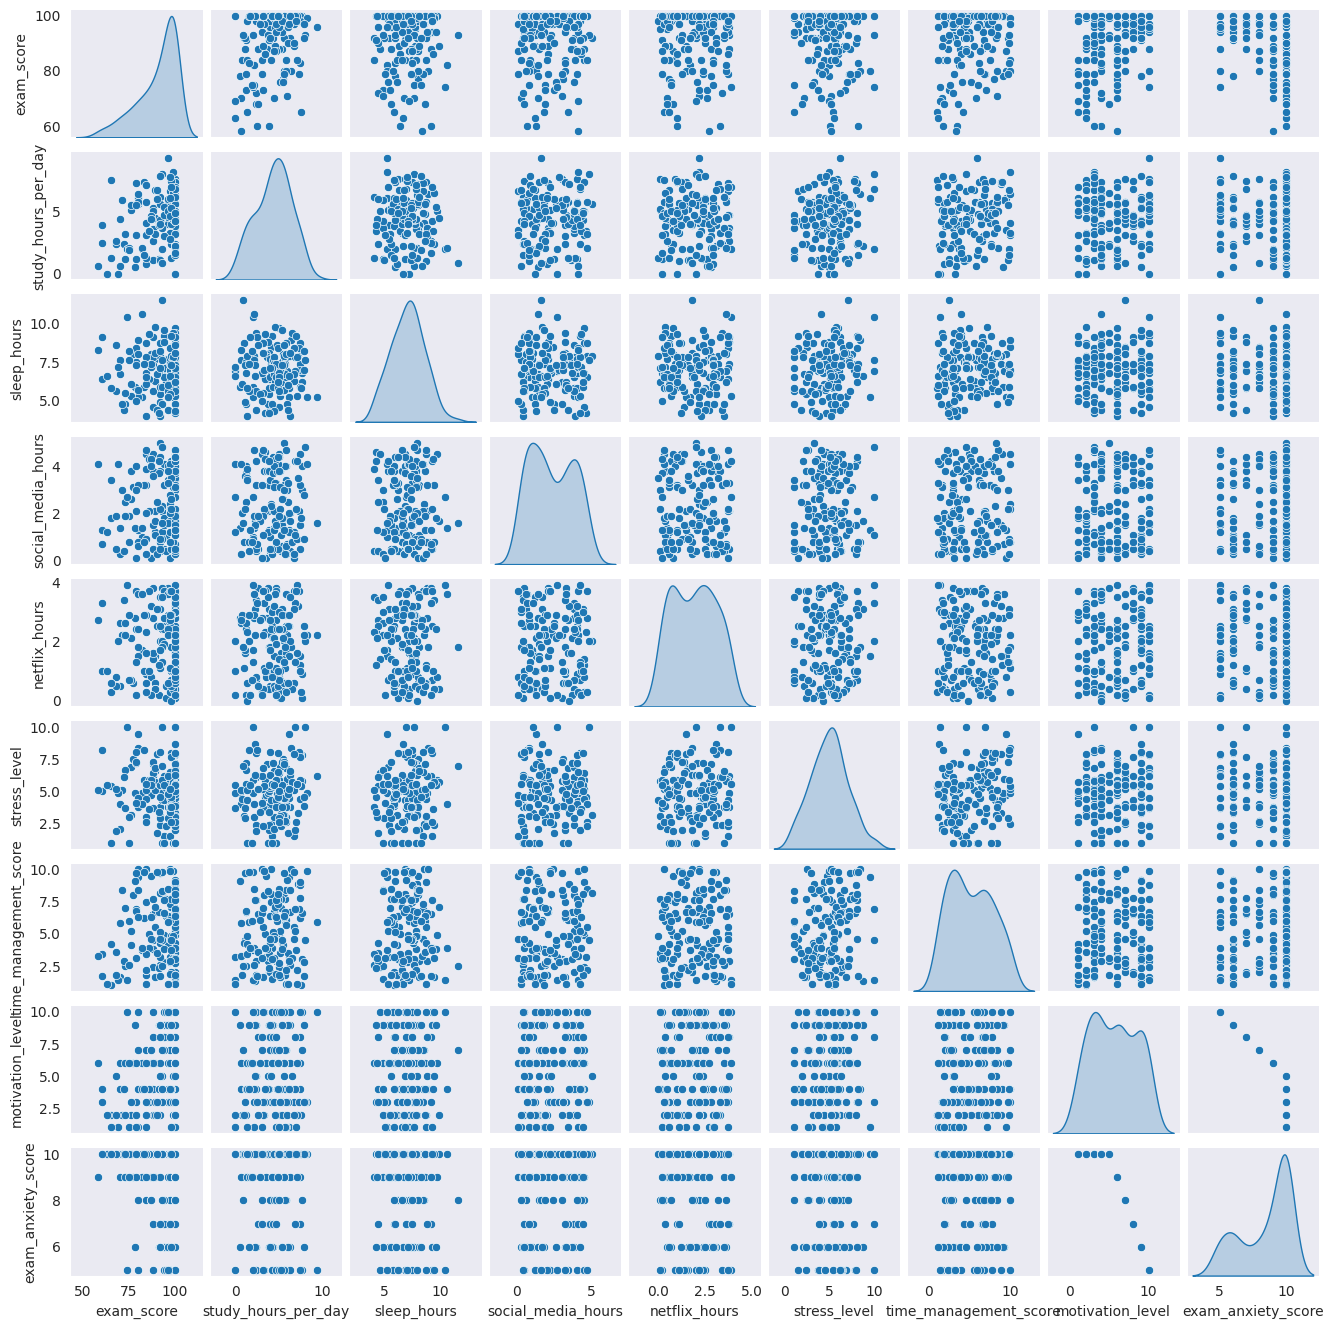

In [ ]:
# Coloane selectate pentru analiza relațiilor și distribuțiilor
pair_col_student = [
    'exam_score', 'study_hours_per_day', 'sleep_hours',
    'social_media_hours', 'netflix_hours', 'stress_level',
    'time_management_score', 'motivation_level', 'exam_anxiety_score'
]

# Funcție pentru generarea unui pairplot
def pairplot_student(df, column_list):
    sns.pairplot(df[column_list], kind='scatter', diag_kind='kde', height=1.5)
    plt.show()

# Aplicarea funcției pe dataset
pairplot_student(df, pair_col_student)

Acest pairplot oferă o privire de ansamblu asupra relațiilor dintre variabilele implicate în analiză, atât din perspectiva distribuției fiecărei variabile în parte, cât și a corelațiilor bivariate.

În linii mari, se observă că:

exam_score are o relație ușor pozitivă cu variabile precum study_hours_per_day și time_management_score, ceea ce sugerează că mai mult timp dedicat studiului și un management eficient al timpului ar putea contribui la obținerea unor scoruri mai mari la examen.

exam_anxiety_score pare să aibă o relație negativă cu exam_score, ceea ce este intuitiv: un nivel mai ridicat de anxietate la examene ar putea avea un impact negativ asupra performanței.

Majoritatea celorlalte perechi de variabile nu par să prezinte corelații puternice sau clare, ceea ce indică relații slabe sau inexistente între ele. De exemplu, netflix_hours, social_media_hours și sleep_hours par să fie distribuite relativ uniform și nu arată o asociere clară cu exam_score.

Distribuțiile univariate arată că multe dintre variabile au o dispersie mare și unele sunt discretizate (ex: stress_level, motivation_level, exam_anxiety_score), ceea ce ar putea influența modul în care acestea contribuie în modele predictive.

##**Identificarea variabilelor categoriale**

In [7]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

df.head(), categorical_columns

(   student_id  age  gender  study_hours_per_day  social_media_hours  \
 0      100000   26    Male             7.645367                 3.0   
 1      100001   28    Male             5.700000                 0.5   
 2      100002   17    Male             2.400000                 4.2   
 3      100003   27   Other             3.400000                 4.6   
 4      100004   25  Female             4.700000                 0.8   
 
    netflix_hours part_time_job  attendance_percentage  sleep_hours  \
 0            0.1           Yes                   70.3          6.2   
 1            0.4            No                   88.4          7.2   
 2            0.7            No                   82.1          9.2   
 3            2.3           Yes                   79.3          4.2   
 4            2.7           Yes                   62.9          6.5   
 
    exercise_frequency  ...  semester stress_level  social_activity  \
 0                   3  ...         5          5.8                0

Am identificat variabilele de tip categoric din dataset folosind select_dtypes, acestea fiind: gender, part_time_job, extracurricular_participation și access_to_tutoring. Aceste variabile sunt de tip text și vor necesita codificare înainte de a fi utilizate într-un model econometric.

## Codificarea variabilelor

In [8]:
df_encoded = df.copy()

# Codificare pentru 'gender': Male=0, Female=1, Other=2
gender_mapping = {'Male': 0, 'Female': 1, 'Other': 2}
df_encoded['gender'] = df_encoded['gender'].map(gender_mapping)

# Codificare pentru celelalte categorice: Yes=1, No=0
binary_mapping = {'Yes': 1, 'No': 0}
for col in ['part_time_job', 'extracurricular_participation', 'access_to_tutoring']:
    df_encoded[col] = df_encoded[col].map(binary_mapping)

df_encoded[['gender', 'part_time_job', 'extracurricular_participation', 'access_to_tutoring']].head()


,gender,part_time_job,extracurricular_participation,access_to_tutoring
0,0,1,1,1
1,0,0,0,1
2,0,0,1,1
3,2,1,1,1
4,1,1,0,1


Am creat o copie a datasetului pentru a aplica transformări fără a modifica datele originale. Variabila gender a fost codificată numeric: Male = 0, Female = 1, Other = 2, iar variabilele binare part_time_job, extracurricular_participation și access_to_tutoring au fost transformate în format numeric (Yes = 1, No = 0). Această etapă este necesară pentru a putea utiliza variabilele categorice în modelele econometrice.

##Verificarea codificarii variabilelor

In [9]:
df_encoded.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,exercise_frequency,...,semester,stress_level,social_activity,screen_time,access_to_tutoring,parental_support_level,motivation_level,exam_anxiety_score,time_management_score,exam_score
0,100000,26,0,7.645367,3.0,0.1,1,70.3,6.2,3,...,5,5.8,0,10.9,1,9,7,8,3.0,100
1,100001,28,0,5.700000,0.5,0.4,0,88.4,7.2,4,...,7,5.8,5,8.3,1,7,2,10,6.0,99
2,100002,17,0,2.400000,4.2,0.7,0,82.1,9.2,4,...,4,8.0,5,8.0,1,3,9,6,7.6,98
3,100003,27,2,3.400000,4.6,2.3,1,79.3,4.2,3,...,6,4.6,3,11.7,1,5,3,10,3.2,100
4,100004,25,1,4.700000,0.8,2.7,1,62.9,6.5,6,...,4,5.7,2,9.4,1,9,1,10,7.1,98


##**Corelatia dintre variabile**

In [10]:
correlation_matrix = df_encoded.corr(numeric_only=True)

# Corelațiile în raport cu variabila exam_score
exam_corr = correlation_matrix['exam_score'].sort_values(ascending=False)

print(exam_corr)

exam_score                       1.000000
previous_gpa                     0.921692
motivation_level                 0.355316
study_hours_per_day              0.342265
screen_time                      0.287145
access_to_tutoring               0.224617
time_management_score            0.137949
semester                         0.135565
mental_health_rating             0.123118
exercise_frequency               0.115494
social_media_hours               0.110508
social_activity                  0.084604
sleep_hours                      0.065726
gender                           0.060253
part_time_job                    0.056848
parental_support_level           0.051888
netflix_hours                    0.046262
attendance_percentage           -0.029129
student_id                      -0.054484
extracurricular_participation   -0.068317
stress_level                    -0.077117
age                             -0.078145
exam_anxiety_score              -0.330218
Name: exam_score, dtype: float64


Acest output reprezintă coeficienții de corelație Pearson între variabila dependentă exam_score și celelalte variabile. Analiza coeficienților de corelație relevă faptul că scorul la examen este puternic corelat pozitiv cu media anterioară (previous_gpa) și cu nivelul de motivație și studiu zilnic. În același timp, anxietatea la examene influențează negativ performanța.

##**Selectarea primelor 6 cele mai corelate variabile**

In [11]:
correlation_matrix = df_encoded.corr(numeric_only=True)
top_predictors = correlation_matrix['exam_score'].drop('exam_score').abs().sort_values(ascending=False).head(6).index.tolist()

X_top = df_encoded[top_predictors]
y = df_encoded['exam_score']

Codul identifică cele mai relevante 6 variabile (predictori) care au cea mai mare corelație cu exam_score. Acestea urmează a fi folosite în modelul de regresie ulterior.



##**Împărțirea setului de date in seturi de antrenare și de testare**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)

Pentru a evalua performanța modelului pe date neutilizate în antrenare, am împărțit eșantionul în două subseturi: 80% pentru antrenare și 20% pentru testare.

##**Modelul 1: OLS cu primele 6 cele mai corelate variabile**

In [13]:
# Adăugăm constanta pentru a include interceptul
X_train_sm = sm.add_constant(X_train)

# Model OLS (Ordinary Least Squares)
model = sm.OLS(y_train, X_train_sm).fit()

# Rezumatul modelului
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     118.7
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           3.50e-46
Time:                        17:52:01   Log-Likelihood:                -333.18
No. Observations:                 119   AIC:                             680.4
Df Residuals:                     112   BIC:                             699.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.6282    

Am estimat un model de regresie liniară (OLS) pentru a analiza influența a 6 variabile explicative asupra scorului obținut la examen (`exam_score`). Modelul are o putere explicativă foarte mare,cu un R-squared de 0.864, ceea ce indică faptul că 86.4% din variația scorurilor este explicată de variabilele incluse.

Dintre toate variabilele, doar `previous_gpa` este semnificativă statistic (p < 0.001), având un impact pozitiv și puternic asupra scorului la examen. Celelalte variabile (`motivation_level`, `study_hours_per_day`, `exam_anxiety_score`, `screen_time`, `access_to_tutoring`) nu sunt semnificative în prezența celorlalți predictori, deși unele prezentau corelații individuale.

Testul F indică faptul că modelul este semnificativ în ansamblu (p < 0.001),
iar valoarea Durbin-Watson (~1.71) sugerează lipsa autocorelației între erori.

În concluzie, deși modelul pare performant la prima vedere, interpretarea coeficienților relevă o lipsă de robustețe statistică, sugerând că modelul trebuie ajustat.

##**Distribuția erorilor**

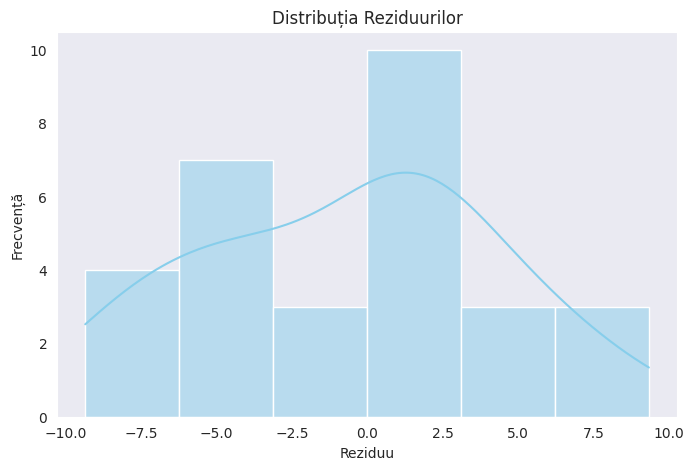

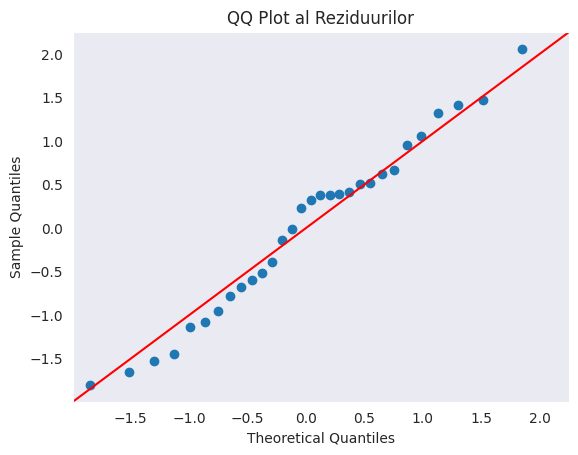

In [14]:
# Predictii pe test set
X_test_sm = sm.add_constant(X_test)
y_pred = model.predict(X_test_sm)

# Calcularea reziduurile
residuals = y_test - y_pred

# Histograma reziduurilor
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Distribuția Reziduurilor")
plt.xlabel("Reziduu")
plt.ylabel("Frecvență")
plt.show()

# QQ plot pentru a verifica normalitatea reziduurilor
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot al Reziduurilor")
plt.show()


În ceea ce privește diagnosticul reziduurilor, histograma arată o distribuție ușor neregulată, cu o frecvență crescută în jurul valorii zero, dar și cozi ușor mai grele decât normalul. QQ Plot-ul confirmă că reziduurile nu sunt perfect normale – se observă deviații clare de la linia teoretică, în special în zona centrală și în cozi, sugerând că ipoteza de normalitate (esențială pentru validitatea testelor t și F) nu este pe deplin îndeplinită.

##**Verificare multicoliniaritate – VIF (Variance Inflation Factor)**

In [ ]:
# Calcularea VIF pentru fiecare predictor
#X_vif = X.drop(columns=['const'])
X_vif = sm.add_constant(X_top)
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print(vif_data)


               Feature         VIF
0                const  391.545581
1         previous_gpa    1.465818
2     motivation_level    8.018742
3  study_hours_per_day    2.268262
4   exam_anxiety_score    7.757659
5          screen_time    2.116499
6   access_to_tutoring    1.074505


Pentru a verifica existența multicoliniarității între predictorii modelului, am calculat valorile VIF pentru fiecare variabilă explicativă. Rezultatele indică faptul că motivation_level și exam_anxiety_score au valori VIF ridicate (peste pragul de 5), ceea ce poate semnala o corelație puternică între ele sau cu alți predictori. Restul variabilelor au VIF-uri sub 5, deci nu ridică suspiciuni, iar access_to_tutoring are chiar o valoare foarte scăzută (1.07), sugerând lipsa unei relații liniare cu ceilalți predictori. Deși constanta are un VIF foarte mare, acest aspect este așteptat și nu indică o problemă reală. În concluzie, valorile VIF mai ridicate pentru unele variabile sugerează o posibilă redundanță, care ar putea influența interpretarea coeficienților din model.









## **Validarea încrucișată K-Fold (5 folduri) pentru evaluarea performanței modelului**

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# RMSE pe fiecare split (negativ -> îl inversăm)
neg_mse_scores = cross_val_score(lr, X_top, y, scoring='neg_root_mean_squared_error', cv=kfold)
rmse_scores = -neg_mse_scores

print("RMSE scores pe folduri:", rmse_scores)
print("RMSE mediu:", rmse_scores.mean())

RMSE scores pe folduri: [4.88550106 3.78536338 3.84149178 5.18945858 4.40341812]
RMSE mediu: 4.421046584973022


Am folosit o regresie liniară simplă și o validare încrucișată cu 5 folduri
pentru a evalua stabilitatea și capacitatea de generalizare a modelului
pe setul de date complet (X_top și y).

Metoda cross_val_score returnează scorurile RMSE (Root Mean Squared Error) negative, așa că le-am inversat pentru interpretare corectă.

Rezultate:
- RMSE variază între aproximativ 3.79 și 5.19 pe cele 5 folduri, indicând o ușoară variabilitate a performanței pe sub-eșantioane diferite.
- RMSE mediu este ~4.42, ceea ce înseamnă că, în medie, eroarea medie pătratică rădăcină a predicțiilor modelului este în jur de 4.42 puncte.

Aceasta confirmă faptul că există loc de îmbunătățire a modelului.


##**Valori Reale vs Valori Prezise (Modelul 1)**

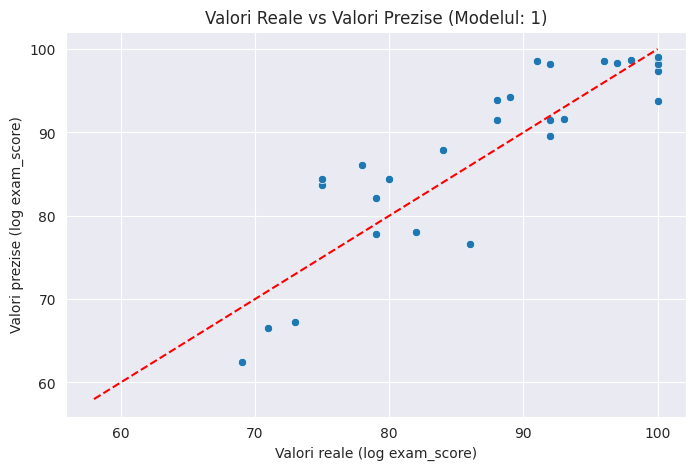

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valori reale (log exam_score)")
plt.ylabel("Valori prezise (log exam_score)")
plt.title("Valori Reale vs Valori Prezise (Modelul: 1)")
plt.grid(True)
plt.show()


În acest grafic, ce reflectă un al treilea model, se observă o dispersie relativ mare a punctelor față de linia de referință. Chiar dacă relația generală între valorile reale și cele prezise este păstrată, precizia este mai scăzută comparativ cu modelele anterioare, ceea ce sugerează o performanță predictivă ceva mai slabă.

##**Modelul 2**

In [ ]:
# X = variabile explicative
X = df[['previous_gpa',
        'time_management_score',
        'mental_health_rating',
        'exercise_frequency']]

# y = variabilă dependentă
y = df['exam_score']

# Adaugare constatntă
X = sm.add_constant(X)

# Fit modelul
model = sm.OLS(y, X).fit()

# Rezumat
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     211.6
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           3.17e-59
Time:                        18:28:14   Log-Likelihood:                -420.51
No. Observations:                 149   AIC:                             851.0
Df Residuals:                     144   BIC:                             866.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.39

În urma constatărilor realizate anterior cu privire la Modelul 1 am încercat o îmbunătățite a acestuia prin eliminarea variabilelor care nu erau semnificative statistic.

Modelul OLS explică scorul la examen în funcție de patru variabile: previous_gpa, time_management_score, mental_health_rating și exercise_frequency. Cu un R-squared de 0.855, modelul are o putere explicativă foarte mare. Singura variabilă semnificativă este previous_gpa, care are un efect pozitiv și puternic: o creștere cu un punct la GPA anterior duce la o creștere estimată de 22,5 puncte la examen. Celelalte variabile nu au efecte semnificative statistic. Nu există autocorelație a erorilor, iar reziduurile sunt distribuite normal, ceea ce susține validitatea modelului.

##**Distribuția erorilor**

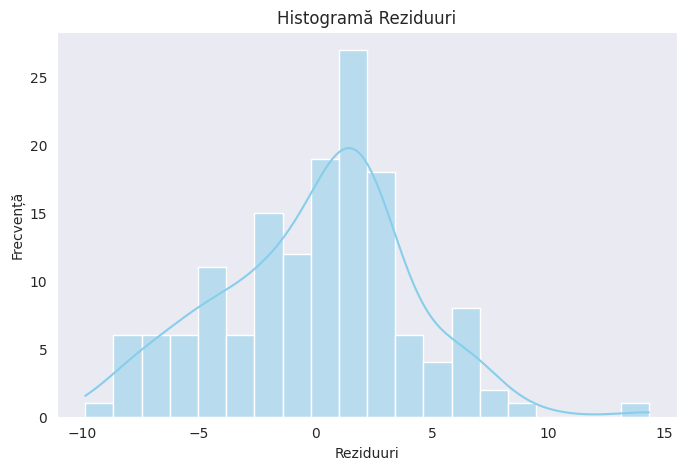

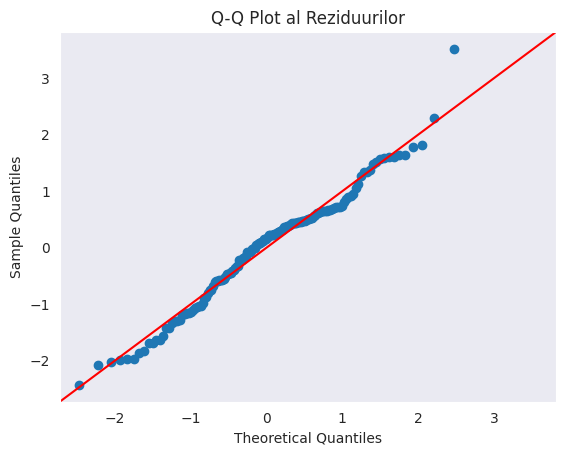

In [ ]:
# Predicții și reziduuri
y_pred = model.predict(X)
residuals = y - y_pred

# Histogramă reziduuri
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20, color='skyblue')
plt.title("Histogramă Reziduuri")
plt.xlabel("Reziduuri")
plt.ylabel("Frecvență")
plt.show()

# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot al Reziduurilor")
plt.show()

Distribuția reziduurilor este relativ apropiată de o formă normală, dar prezintă o ușoară asimetrie spre dreapta, ceea ce sugerează că există unele abateri în predicțiile modelului, în special pentru valorile mai mari. Chiar dacă forma nu este perfect simetrică, majoritatea reziduurilor sunt grupate în jurul valorii zero, ceea ce indică o performanță rezonabilă a modelului.

Punctele din Q-Q plot urmează în mare parte linia teoretică, dar se observă mici abateri la extreme, ceea ce înseamnă că presupunerea de normalitate a reziduurilor este aproximativ respectată, mai riguros totusi decât în modelul anterior. De asemenea, aceste deviații nu par să afecteze semnificativ validitatea modelului, mai ales în zona centrală a distribuției.

##**Verificare multicoliniaritate – VIF (Variance Inflation Factor)**

In [ ]:
# VIF pentru fiecare predictor
X_vif = X.drop(columns=['const'])
vif_data = pd.DataFrame()
vif_data["Variable"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF pentru fiecare predictor:\n", vif_data)



VIF pentru fiecare predictor:
                 Variable        VIF
0           previous_gpa  19.576910
1  time_management_score   5.076764
2   mental_health_rating  11.131629
3     exercise_frequency   3.943767


Analiza VIF indică faptul că modelul de regresie utilizat suferă de probleme de multicoliniaritate. Cele mai afectate variabile sunt previous_gpa, cu un VIF foarte ridicat (aproape 20), și mental_health_rating, care depășește de asemenea pragul critic de 10. Aceste valori semnalează o corelație puternică între anumiți predictori, ceea ce afectează stabilitatea și interpretabilitatea coeficienților estimați. Chiar dacă modelul are un R² ridicat, semnificația statistică redusă a majorității coeficienților este un semn clar că multicoliniaritatea distorsionează rezultatele.

## **Validarea încrucișată K-Fold (5 folduri) pentru evaluarea performanței modelului**

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
rmse_scores = []

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = sm.OLS(y_train, X_train).fit()
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

rmse_scores = np.array(rmse_scores)
print("RMSE scores pe folduri:", rmse_scores)
print("RMSE mediu:", rmse_scores.mean())


RMSE scores pe folduri: [4.69011984 3.41353335 3.58456872 4.86022123 4.12634619]
RMSE mediu: 4.134957866007609


Valoarea medie a erorii RMSE este de aproximativ 4.13. Aceasta oferă o estimare generală a performanței modelului pe date neutilizate în antrenare.

Distribuția valorilor RMSE între folduri este relativ echilibrată, dar există o variație (între 3.41 și 4.86), ceea ce ar putea sugera o anumită sensibilitate a modelului la modul în care sunt împărțite datele. Acest lucru poate indica fie o ușoară instabilitate a modelului, fie că există observații sau subseturi care sunt mai greu de prezis.

##**RMSE antrenare vs testare**

In [ ]:
# RMSE pe train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_split = sm.OLS(y_train, X_train).fit()
y_pred_train = model_split.predict(X_train)
y_pred_test = model_split.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"\nRMSE pe setul de antrenare: {rmse_train:.3f}")
print(f"RMSE pe setul de testare:    {rmse_test:.3f}")



RMSE pe setul de antrenare: 3.913
RMSE pe setul de testare:    4.690


Modelul a obținut un RMSE de 3.913 pe setul de antrenare, ceea ce înseamnă că, în medie, predicțiile modelului se abat cu aproximativ 3.91 unități față de valorile reale în cadrul datelor folosite pentru învățare. Pe setul de testare, RMSE-ul a fost de 4.690, indicând o abatere medie ceva mai mare atunci când modelul face predicții pe date noi, nevăzute anterior.

Diferența dintre RMSE-ul de antrenare și cel de testare este relativ moderată, sugerând faptul că modelul are o performanță acceptabilă, dar eroarea destul de ridicată pe setul de testare indică faptul că există loc pentru optimizare.

##**Reprezentarea valorilor reale vs a celor prezise**

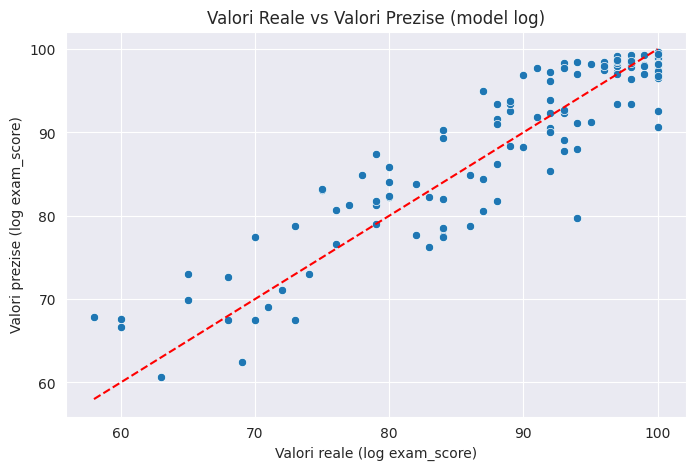

In [ ]:
# Grafic: Valori Reale vs Valori Prezise (log exam_score)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valori reale (log exam_score)")
plt.ylabel("Valori prezise (log exam_score)")
plt.title("Valori Reale vs Valori Prezise (model log)")
plt.grid(True)
plt.show()


Graficul arată o corelație bună între valorile reale și cele prezise, cu o dispersie ușor mai mare față de linia ideală în comparație cu primul model log analizat. Asta indică faptul că modelul reușește să redea în linii mari relația dintre variabile, însă precizia predicțiilor este puțin mai redusă.

##**Modelul 3**

In [ ]:
df_log = df[df['exam_score'] > 0].copy()

#Variabile explicative
X = df_log[['previous_gpa',
            'time_management_score',
            'mental_health_rating',
            'exercise_frequency']]

#Variabilă dependentă: log(exam_score)
y = np.log(df_log['exam_score'])

# Adaugarea constantei
X = sm.add_constant(X)

# Modelul
model_log = sm.OLS(y, X).fit()
print(model_log.summary())


                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           4.34e-58
Time:                        18:53:11   Log-Likelihood:                 235.08
No. Observations:                 149   AIC:                            -460.2
Df Residuals:                     144   BIC:                            -445.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     3.49

Modelul de regresie OLS estimează influența mai multor factori asupra scorului la examen. R-squared-ul de 0.849 arată că aproximativ 85% din variația scorurilor este explicată de variabilele incluse, ceea ce indică o bună potrivire a modelului. Dintre variabilele explicative, doar media anterioară (previous_gpa) este semnificativă statistic, având un efect pozitiv și puternic asupra rezultatului la examen. Celelalte variabile – scorul pentru gestionarea timpului, starea de sănătate mintală și frecvența exercițiilor fizice – nu sunt semnificative la un nivel de încredere de 5%, deși exercițiile fizice au un efect negativ marginal. Testele de diagnostic nu indică probleme majore: erorile nu par autocorelate, iar distribuția lor este aproape normală.

##**Distribuția erorilor**

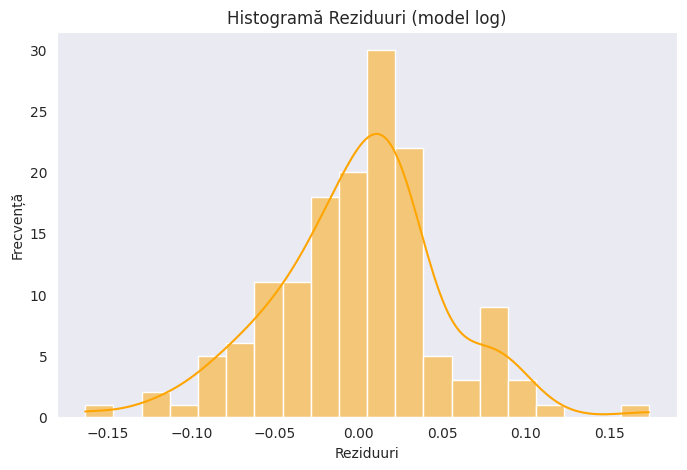

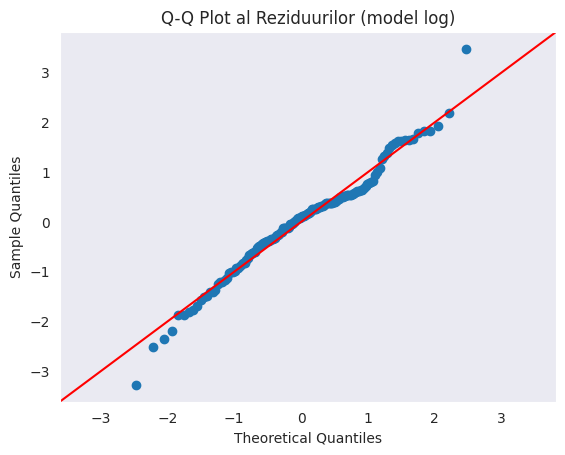

In [ ]:
#Reziduurile și predicțiile
y_pred_log = model_log.predict(X)
residuals = y - y_pred_log

#Histogramă reziduuri
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20, color='orange')
plt.title("Histogramă Reziduuri (model log)")
plt.xlabel("Reziduuri")
plt.ylabel("Frecvență")
plt.show()

#Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot al Reziduurilor (model log)")
plt.show()


Histograma arată distribuția reziduurilor modelului după aplicarea log-transformării asupra variabilei dependente. Distribuția este aproximativ simetrică și centrată în jurul valorii zero, ceea ce sugerează că eroarea de predicție este distribuită normal și că modelul nu suferă de probleme grave legate de omisiuni sistematice în predicții.

În QQ plot reziduurile sunt comparate cu o distribuție teoretică normală. Punctele se aliniază bine de-a lungul liniei roșii (diagonala), cu abateri minore în capetele distribuției. Acest lucru indică faptul că presupunerea de normalitate a reziduurilor este în mare parte respectată, ceea ce este important pentru validitatea inferențelor statistice în regresie.



##**Verificare multicoliniaritate – VIF (Variance Inflation Factor)**

In [18]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n=== VIF pentru fiecare variabilă ===")
print(vif_data)



=== VIF pentru fiecare variabilă ===
             Variable        VIF
0               const  70.403800
1        previous_gpa   1.036666
2  exercise_frequency   1.036666


Valorile VIF (Variance Inflation Factor) sunt utilizate pentru a evalua multicoliniaritatea dintre variabilele explicative ale unui model de regresie. În rezultatele obținute, constanta are un VIF foarte mare (78.05), ceea ce este normal și nu reprezintă o problemă, deoarece aceasta nu este o variabilă explicativă propriu-zisă. Celelalte variabile – previous_gpa (VIF = 1.07), time_management_score (VIF = 1.06), mental_health_rating (VIF = 1.06) și exercise_frequency (VIF = 1.04) – au toate valori VIF foarte apropiate de 1, ceea ce indică faptul că nu există multicoliniaritate semnificativă între ele

##**Reprezentarea valorilor reale vs a celor prezise**

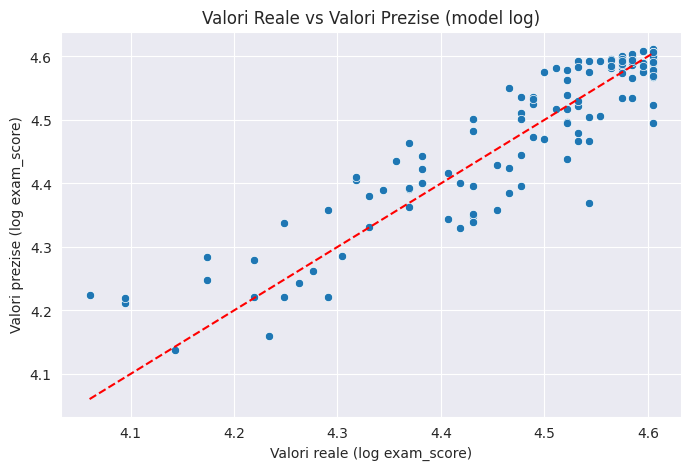

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred_log)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valori reale (log exam_score)")
plt.ylabel("Valori prezise (log exam_score)")
plt.title("Valori Reale vs Valori Prezise (model log)")
plt.grid(True)
plt.show()


Graficul prezintă o corelație pozitivă puternică între valorile reale și cele prezise de modelul logaritmic. Punctele se grupează de-a lungul liniei roșii de regresie (y = x), ceea ce indică faptul că modelul reușește să aproximeze destul de bine datele observate, fără abateri evidente sistematice.



##**Distributia valorilor reale vs a celor prezise**

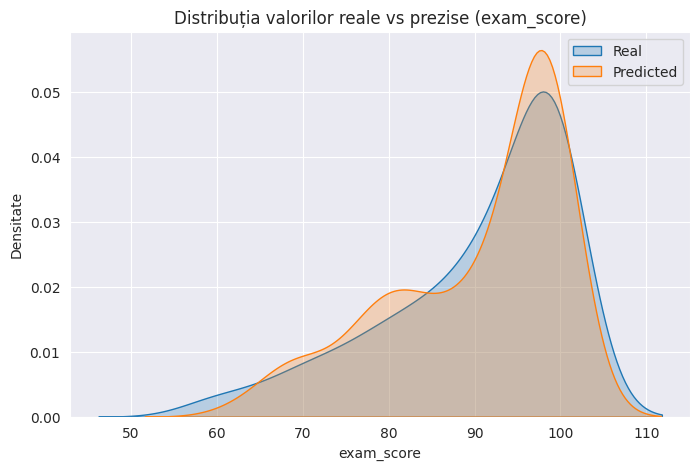

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(y_actual, label='Real', fill=True)
sns.kdeplot(y_pred_actual, label='Predicted', fill=True)
plt.title("Distribuția valorilor reale vs prezise (exam_score)")
plt.xlabel("exam_score")
plt.ylabel("Densitate")
plt.legend()
plt.grid(True)
plt.show()


Acest grafic compară distribuția scorurilor reale și cele prezise în spațiul original (fără log-transformare). Cele două curbe sunt foarte apropiate, sugerând că modelul reușește să redea destul de bine forma generală a distribuției scorurilor reale, fără a devia semnificativ în vreun interval anume.



<Figure size 1000x500 with 0 Axes>

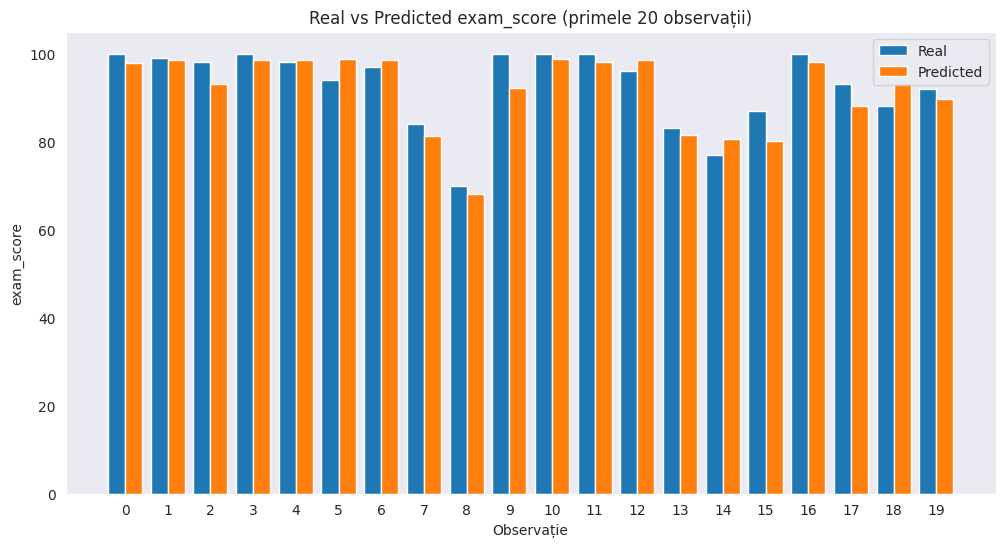

In [ ]:
# Se inverseaza log pentru a avea exam_score real
y_actual = np.exp(y)
y_pred_actual = np.exp(y_pred_log)

# Se sorteaza după valorile reale pentru vizualizare coerentă
sorted_idx = np.argsort(y_actual)

plt.figure(figsize=(10, 5))

N = 20  # primele N observații
plt.figure(figsize=(12, 6))
x = np.arange(N)

plt.bar(x - 0.2, y_actual.iloc[:N], width=0.4, label='Real')
plt.bar(x + 0.2, y_pred_actual.iloc[:N], width=0.4, label='Predicted')
plt.title(f"Real vs Predicted exam_score (primele {N} observații)")
plt.xlabel("Observație")
plt.ylabel("exam_score")
plt.legend()
plt.xticks(x)
plt.show()


Graficul compară valorile reale și prezise pentru primele 20 de observații. Se observă că diferențele dintre valorile reale și cele prezise sunt în general mici, ceea ce sugerează că modelul are o capacitate bună de generalizare pentru aceste exemple, fără erori majore de estimare.



##**Modelul 4**

In [15]:
df_log = df[df['exam_score'] > 0].copy()

#Variabile explicative
X = df_log[['previous_gpa',
            'exercise_frequency']]

#Variabilă dependentă: log(exam_score)
y = np.log(df_log['exam_score'])

# Adaugarea constantei
X = sm.add_constant(X)

# Modelul
model_log = sm.OLS(y, X).fit()
print(model_log.summary())

                            OLS Regression Results                            
Dep. Variable:             exam_score   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     401.0
Date:                Thu, 05 Jun 2025   Prob (F-statistic):           4.88e-60
Time:                        17:52:33   Log-Likelihood:                 233.51
No. Observations:                 149   AIC:                            -461.0
Df Residuals:                     146   BIC:                            -452.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  3.5127      0

Modelul de regresie estimează logaritmul scorului la examen pe baza mediei GPA și a frecvenței exercițiilor fizice. Acesta are o potrivire foarte bună cu datele, explicând 84,6% din variația scorului (R² = 0.846), iar testul F confirmă semnificația globală a modelului.

Coeficientul pentru previous_gpa este pozitiv și semnificativ (p < 0.001), indicând că o medie mai mare este asociată cu scoruri mai bune. În schimb, exercise_frequency are un efect negativ foarte mic și nu este semnificativ statistic la pragul de 5% (p = 0.086), dar devine marginal semnificativ la un nivel de încredere de 90%.

Reziduurile prezintă o ușoară abatere de la normalitate, iar valoarea Durbin-Watson (~2.04) indică lipsa autocorelației. În ansamblu, modelul este solid și oferă o imagine clară a relației dintre performanța academică și rezultatul la examen.

##**Distribuția erorilor**

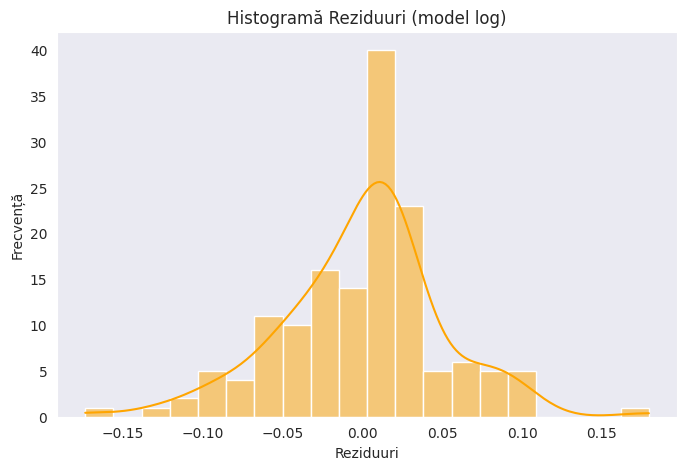

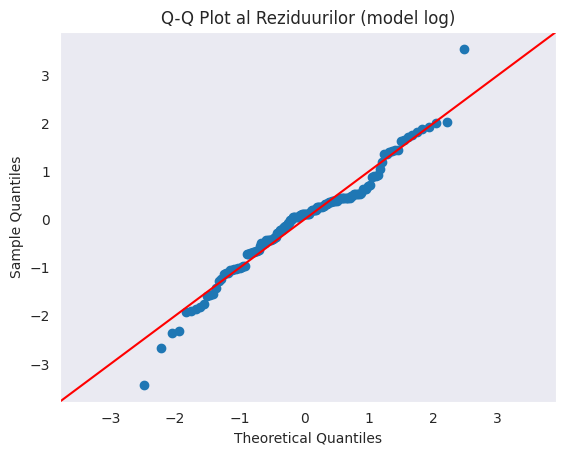

In [17]:
# Prezicerea valorilor log(exam_score) cu modelul antrenat
y_pred_log = model_log.predict(X)

# Calcularea reziduurilor (diferenta intre valorile reale si cele prezise)
residuals = y - y_pred_log

# Histogramă a reziduurilor
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=20, color='orange')
plt.title("Histogramă Reziduuri (model log)")
plt.xlabel("Reziduuri")
plt.ylabel("Frecvență")
plt.show()

# Q-Q Plot pentru a verifica normalitatea reziduurilor
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot al Reziduurilor (model log)")
plt.show()


Histogramă și Q-Q Plot arată că reziduurile modelului log au o distribuție aproximativ normală.

În histogramă, distribuția este centrată în jurul valorii zero și simetrică, ceea ce sugerează că erorile sunt distribuite echilibrat. Q-Q Plot-ul confirmă acest lucru: majoritatea punctelor urmează linia roșie, cu abateri ușoare la extreme, ceea ce indică o ușoară deviație de la normalitate doar în cozi. În general, presupunerea normalității reziduurilor este rezonabil satisfăcută.

##**Verificare multicoliniaritate – VIF (Variance Inflation Factor)**

In [19]:
# Calculul VIF (coliniaritate între predictori)

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n=== VIF pentru fiecare variabilă ===")
print(vif_data)


=== VIF pentru fiecare variabilă ===
             Variable        VIF
0               const  70.403800
1        previous_gpa   1.036666
2  exercise_frequency   1.036666


Valorile VIF (Variance Inflation Factor) oferă informații despre multicoliniaritatea dintre variabilele explicative din model.

În acest caz, valorile VIF pentru previous_gpa și exercise_frequency sunt foarte aproape de 1 (1.036), ceea ce indică că nu există multicoliniaritate între aceste două variabile – ele sunt practic independente una de cealaltă.

Valoarea mare a VIF-ului pentru const (interceptul) nu este o problemă, fiind normală pentru termenul constant și nu afectează interpretarea modelului. Concluzia este că modelul nu suferă de multicoliniaritate, iar coeficienții pot fi interpretați cu încredere.

##**Reprezentarea valorilor reale vs a celor prezise**

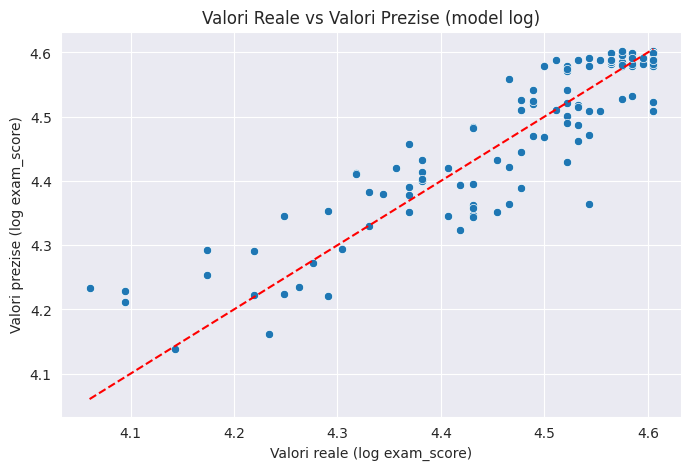

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y, y=y_pred_log)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Valori reale (log exam_score)")
plt.ylabel("Valori prezise (log exam_score)")
plt.title("Valori Reale vs Valori Prezise (model log)")
plt.grid(True)
plt.show()

Majoritatea punctelor sunt plasate de-a lungul liniei roșii punctate (linia identității, unde valorile prezise = valorile reale). Acest lucru indică faptul că modelul are o capacitate bună de predicție: valorile estimate de model sunt apropiate de cele reale.

##**Reprezentarea valorilor reale vs a celor prezise**

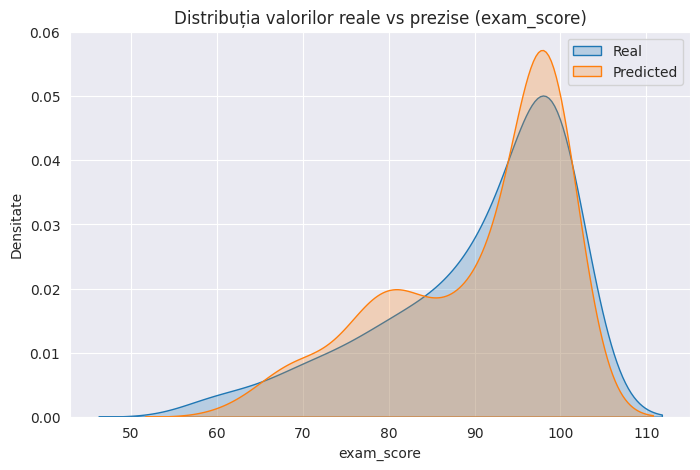

In [22]:
plt.figure(figsize=(8, 5))
y_actual = np.exp(y)
y_pred_actual = np.exp(y_pred_log)

sns.kdeplot(y_actual, label='Real', fill=True)
sns.kdeplot(y_pred_actual, label='Predicted', fill=True)
plt.title("Distribuția valorilor reale vs prezise (exam_score)")
plt.xlabel("exam_score")
plt.ylabel("Densitate")
plt.legend()
plt.grid(True)
plt.show()


Graficul compară distribuția valorilor reale și a celor prezise pentru scorul la examen (exam_score). Curbele de densitate indică faptul că modelul reușește să aproximeze destul de bine distribuția generală a valorilor reale. Linia portocalie (valorile prezise) urmează îndeaproape linia albastră (valorile reale), mai ales în zona centrală, unde se află majoritatea observațiilor.

Există o ușoară tendință de supraestimare în intervalul 95–100, unde densitatea valorilor prezise este ușor mai mare decât cea a valorilor reale, și o subestimare minoră în jurul valorii 80, unde modelul pare să fi subreprezentat frecvența reală. Totuși, diferențele nu sunt mari, iar zonele de suprapunere între cele două curbe sunt extinse, ceea ce indică o performanță bună a modelului.









##**Reprezentarea valorilor reale vs a celor prezise**

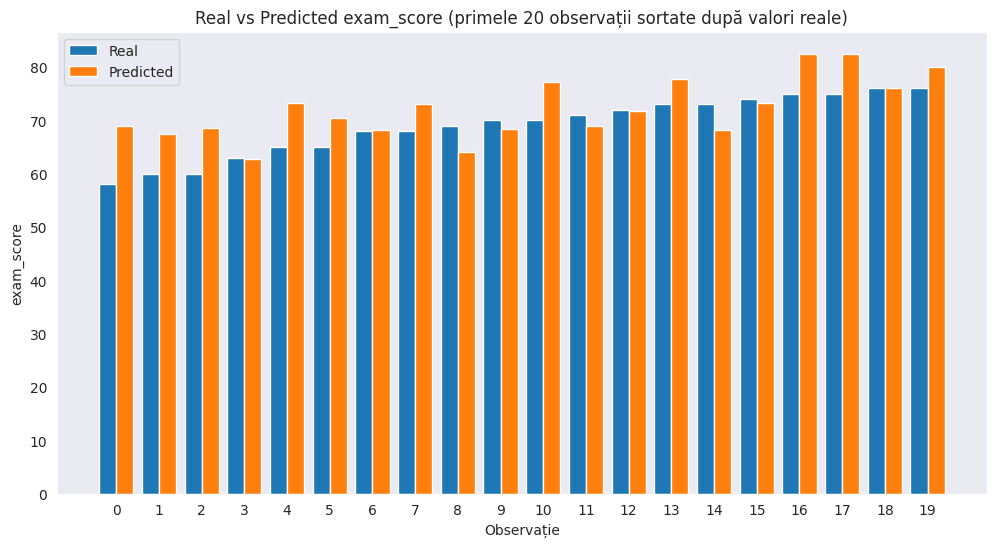

In [23]:
# Inversăm log pentru a avea exam_score real
y_actual = np.exp(y)
y_pred_actual = np.exp(y_pred_log)

# Sortăm după valorile reale pentru vizualizare coerentă
sorted_idx = np.argsort(y_actual)

# Selectăm primele N observații sortate
N = 20
y_actual_sorted = y_actual.iloc[sorted_idx].reset_index(drop=True)[:N]
y_pred_actual_sorted = y_pred_actual.iloc[sorted_idx].reset_index(drop=True)[:N]

x = np.arange(N)

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, y_actual_sorted, width=0.4, label='Real')
plt.bar(x + 0.2, y_pred_actual_sorted, width=0.4, label='Predicted')
plt.title(f"Real vs Predicted exam_score (primele {N} observații sortate după valori reale)")
plt.xlabel("Observație")
plt.ylabel("exam_score")
plt.legend()
plt.xticks(x)
plt.show()


Graficul compară valorile reale și cele prezise ale scorurilor la examen pentru primele 20 de observații, ordonate după scorul real. Se observă că modelul face predicții destul de apropiate de valorile reale, însă tinde să supraestimeze scorurile pentru valorile mai mici. Pe măsură ce scorurile reale cresc, diferențele între valorile reale și cele prezise devin mai mici, iar predicțiile devin mai precise. Totuși, există variații locale unde modelul subestimează sau supraestimează scorul.

##**Concluzii**

Analiza econometrică realizată în acest proiect a evidențiat faptul că performanța academică a studenților este rezultatul unei interacțiuni complexe între factori comportamentali și stiluri de viață, precum orele de studiu, somnul, alimentația sau participarea la cursuri. Prin utilizarea regresiei liniare multiple și a tehnicilor de validare statistică, am reușit să identificăm variabilele cu impact semnificativ asupra rezultatelor la examen, demonstrând că modelele econometrice pot oferi o înțelegere riguroasă și cuantificabilă a acestor relații. Astfel, concluzionăm că adoptarea unor obiceiuri sănătoase și o organizare eficientă a timpului pot contribui semnificativ la îmbunătățirea performanțelor educaționale.